In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


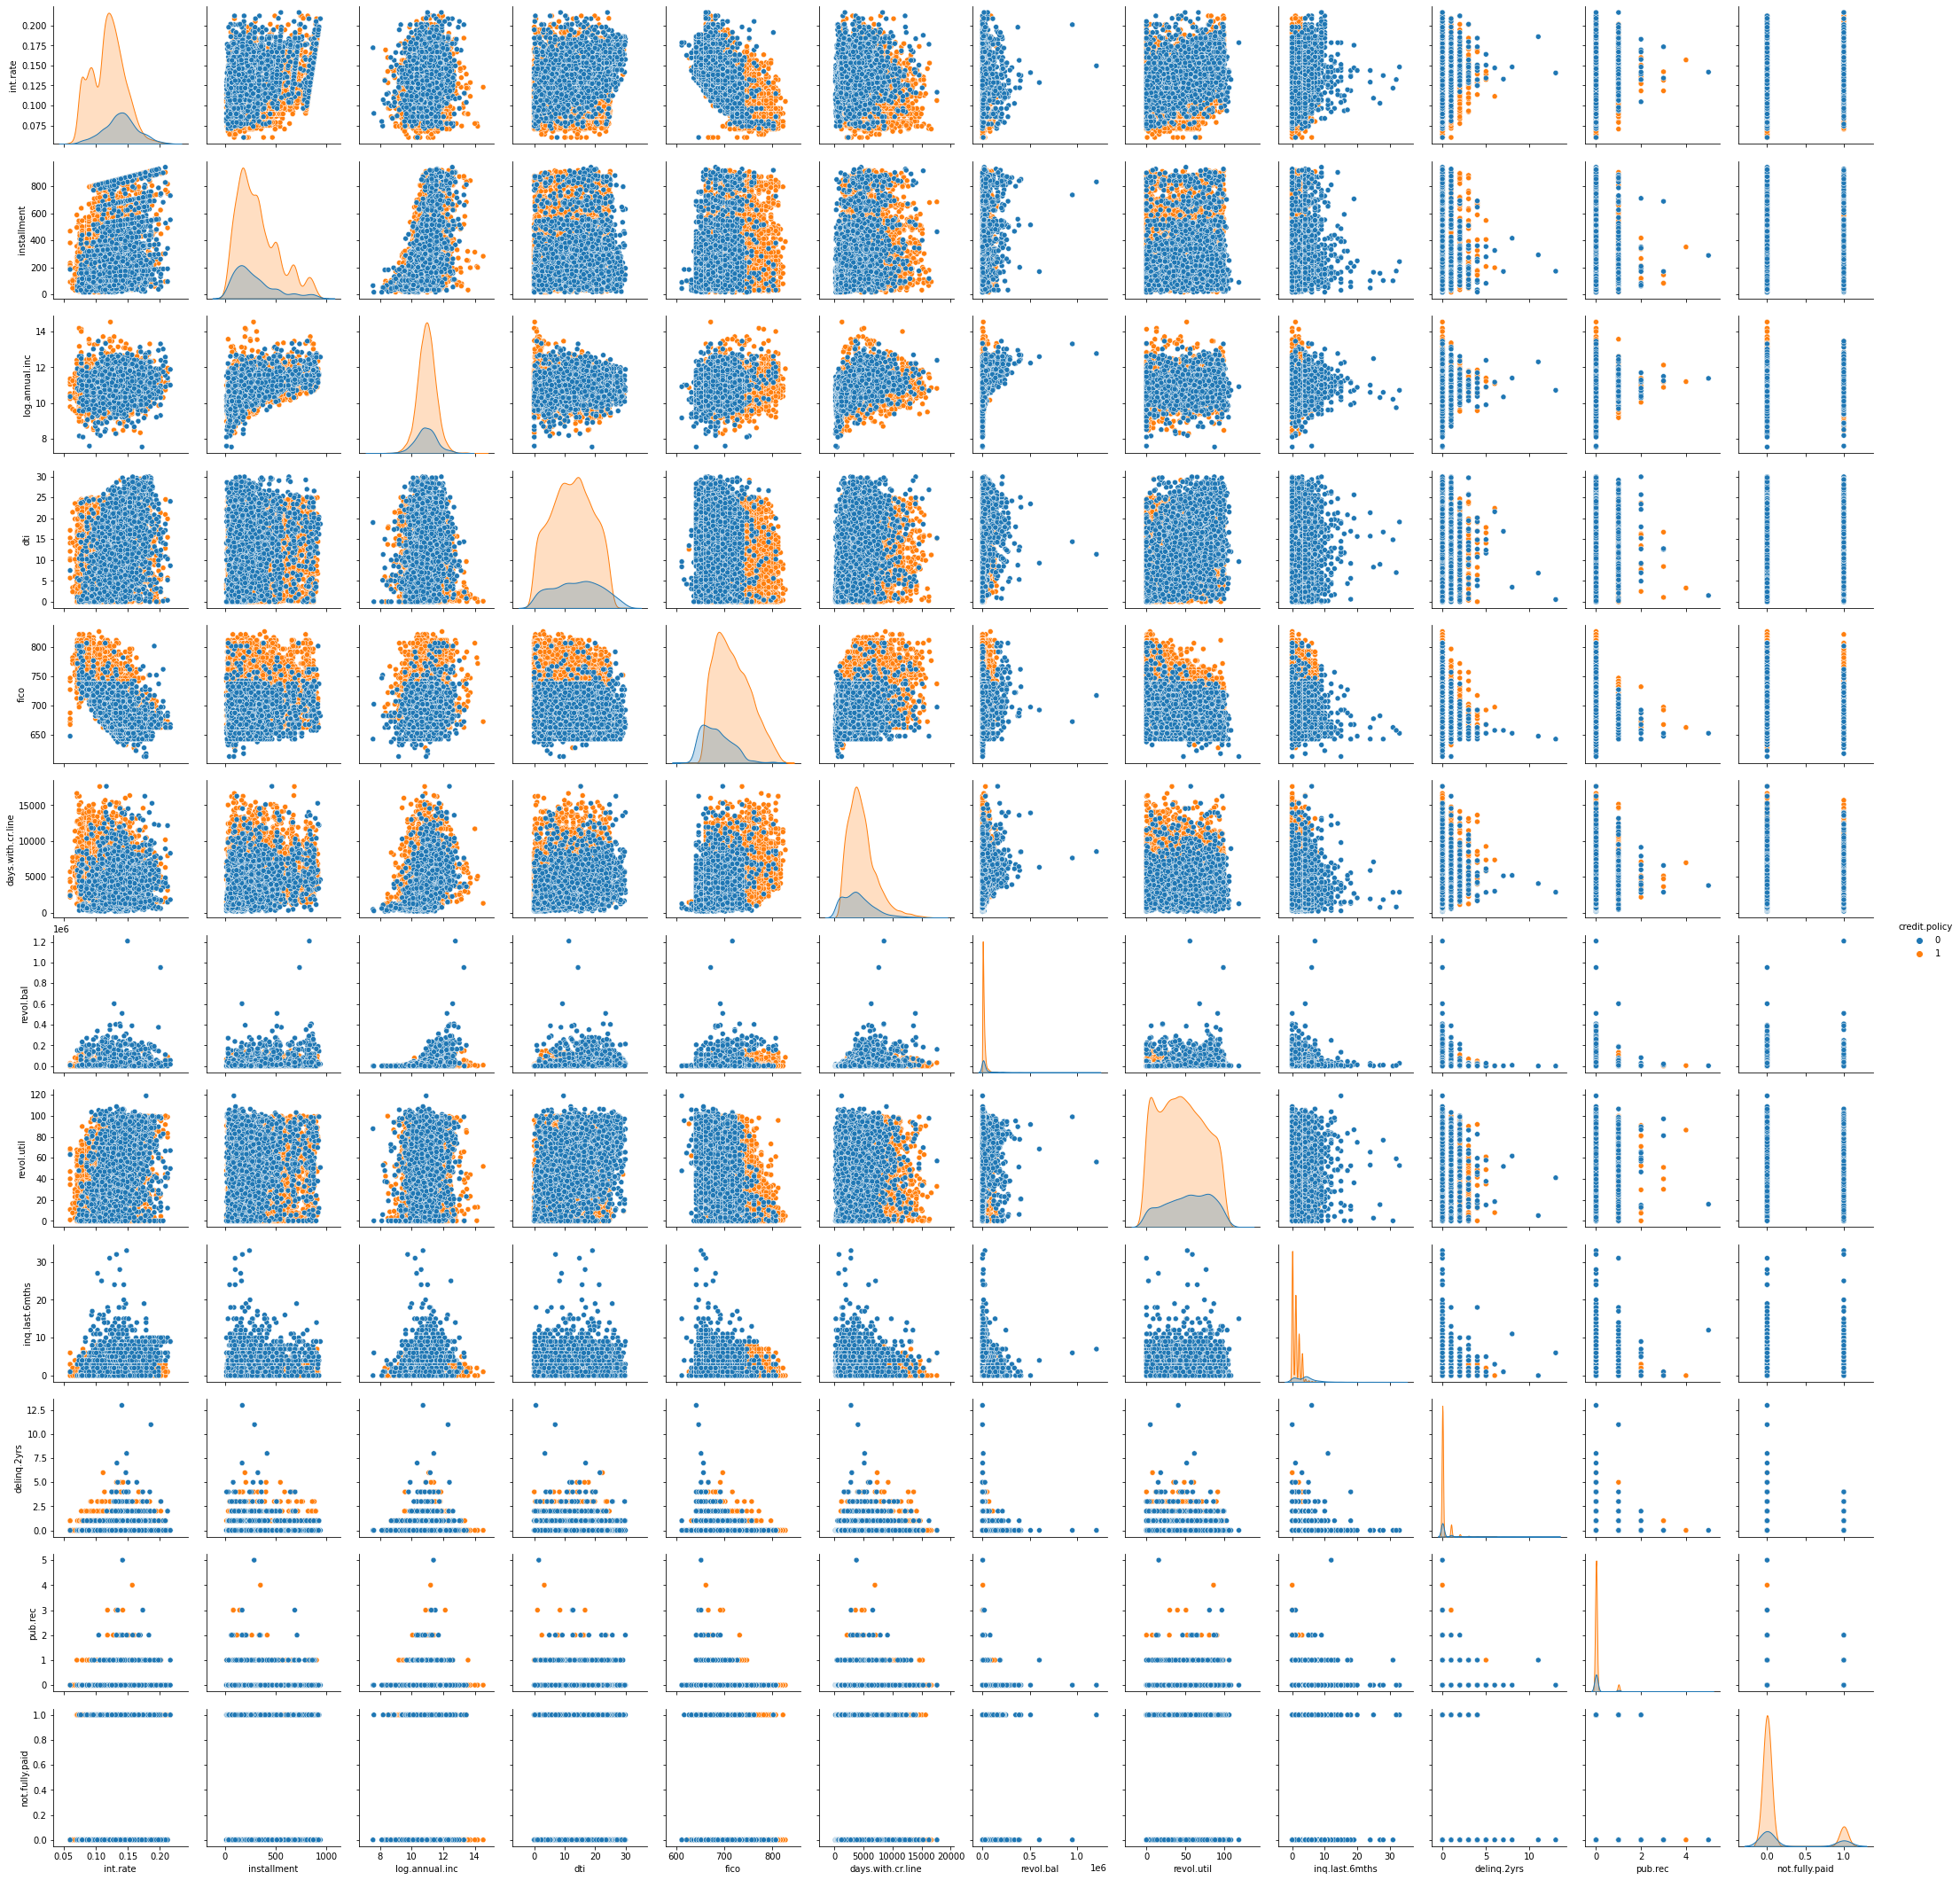

In [5]:
sns.pairplot(df,hue='credit.policy')

<AxesSubplot:xlabel='purpose', ylabel='count'>

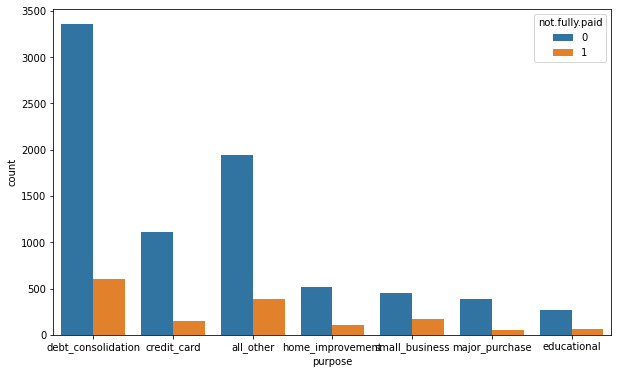

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid',data=df)

In [7]:
final_data = pd.get_dummies(df, columns=['purpose'],drop_first=True)
final_data.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
predictions = dtree.predict(X_test)
predictions

array([1, 0, 1, ..., 1, 0, 1])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2049  388]
 [ 332  105]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2437
           1       0.21      0.24      0.23       437

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.75      0.76      2874



## RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(n_estimators=300)
rft.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [40]:
predictions = rft.predict(X_test)

In [41]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2415   22]
 [ 428    9]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2437
           1       0.29      0.02      0.04       437

    accuracy                           0.84      2874
   macro avg       0.57      0.51      0.48      2874
weighted avg       0.76      0.84      0.78      2874



## KNN 

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
predictions = knn.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2068  369]
 [ 364   73]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2437
           1       0.17      0.17      0.17       437

    accuracy                           0.74      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.75      0.74      0.75      2874



In [61]:
error_rate= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

In [62]:
error_rate

[0.25504523312456506,
 0.1687543493389005,
 0.20041753653444677,
 0.16527487821851078,
 0.1767571329157968,
 0.1579679888656924,
 0.16423103688239388,
 0.15518441196938065,
 0.15762004175365343,
 0.1544885177453027,
 0.1544885177453027,
 0.15309672929714682,
 0.1534446764091858,
 0.1544885177453027,
 0.15518441196938065,
 0.15379262352122477,
 0.15414057063326375,
 0.15309672929714682,
 0.1534446764091858,
 0.15205288796102992,
 0.1524008350730689,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.1524008350730689,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992,
 0.15205288796102992]

Text(0, 0.5, 'Error rate')

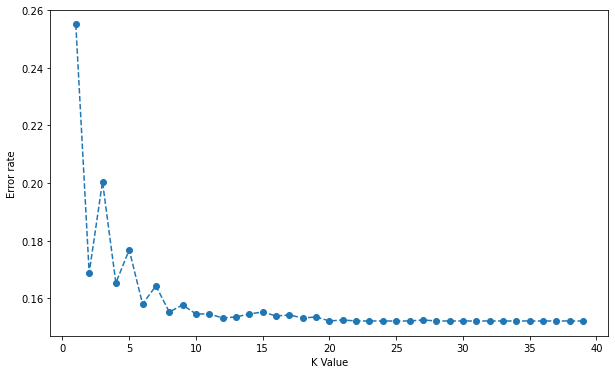

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, linestyle='dashed', marker='o')
plt.xlabel('K Value')
plt.ylabel('Error rate')

In [65]:
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [66]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2437    0]
 [ 437    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2437
           1       0.00      0.00      0.00       437

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



/home/vishnu/jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vishnu/jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vishnu/jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
